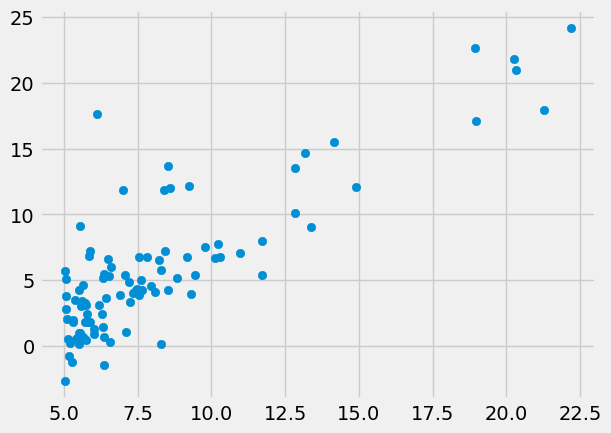

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

from matplotlib import style
style.use('fivethirtyeight')


df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data1.txt'

cols = np.loadtxt(df , delimiter=',' , usecols=(0,1) , unpack=True)

Xs = np.transpose(np.array(cols[:-1]))
Ys = np.transpose(np.array(cols[-1:]))

plt.scatter(Xs , Ys)
plt.show()

# Y = mX + b

m (best_fit) = mean(X) * mean(Y) - mean(X*Y) / square(mean(X)) - mean(square(X))

b (best_fit) = mean(y) - m* mean(X)

In [9]:
def best_fit_slope(Xs, Ys):
    n = len(Xs)
    m = float((n * np.sum(Xs * Ys) - np.sum(Xs) * np.sum(Ys)) / (n * np.sum(Xs**2) - np.sum(Xs)**2))
    return m

def best_fit_intercept(Xs  ,Ys):
    m = best_fit_slope(Xs , Ys)
    b = float((np.mean(Ys) - m*np.mean(Xs)))
    return b

m = best_fit_slope(Xs , Ys)
b = best_fit_intercept(Xs , Ys)
print(m,b)



1.1930336441895943 -3.8957808783118573


# Coefficient of determinination (R^2)

The coefficient of determination is a statistical measure that explains how much of the variability in the dependent variable can be explained by the independent variable(s) in the model.

In naive terms we can say that The coefficient of determination is a measure that tells us how well our model's predictions match the actual data.

In [13]:
def squared_error(ys_orig , ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = np.mean(ys_orig)
    squared_error_regression = squared_error(ys_orig, ys_line)
    squared_error_mean = squared_error(ys_orig, np.full_like(ys_orig, y_mean_line))
    return 1 - (squared_error_regression / squared_error_mean)

In [4]:
# xs = np.array([1,2,3,4,5,6] , dtype=np.float64)
# ys = np.array([5,4,6,5,6,7] , dtype=np.float64)

# best_fit_intercept(xs , ys)


### Regression line

In [14]:
regression_line = [(m*x)+b for x in Xs]

In [15]:
r_squared = coefficient_of_determination(Ys , regression_line)
print(r_squared)

# This tells us that our model's predicted data is about 70% close to the actual data.

[0.70203155]


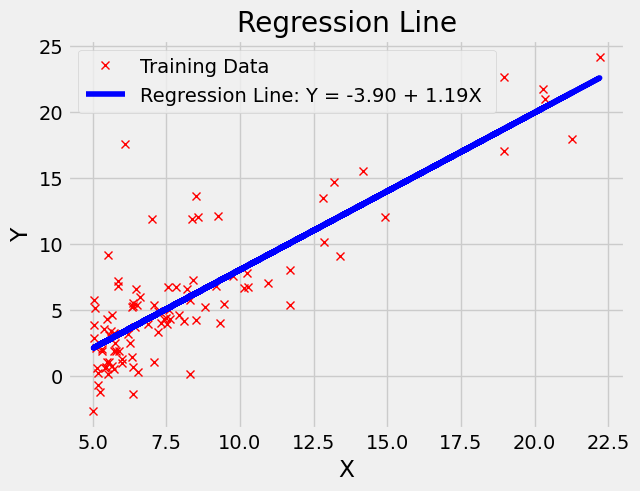

In [16]:
plt.plot(Xs , Ys , 'rx' , label = "Training Data")
plt.plot(Xs, regression_line, 'b-', label='Regression Line: Y = %0.2f + %0.2fX '%(b , m))
# plt.plot(Xs, regression_line, 'b-', label=f'Regression Line: Y = {m:.2f}X + {b:.2f}'
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line')
plt.legend()
plt.show()

4
